based on https://medium.com/datadriveninvestor/an-introduction-to-tensorflow-and-implementing-a-simple-linear-regression-model-d900dd2e9963

In [12]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

In [8]:
x_train = [0,1,2,3,4]
y_train = [0,1,2,3,4]

#defining the weight and bias
W = tf.Variable([-.5], dtype=tf.float32)
b = tf.Variable([.5], dtype=tf.float32)

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

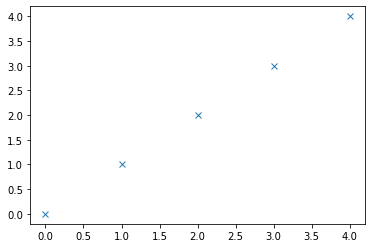

In [18]:
plt.plot(x_train, y_train, 'x')

In [10]:
# using linear function y = Wx + b
lm = W*x + b

#calculating squared error
loss = tf.reduce_sum(tf.square(lm - y))

#using Gradient Descent with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(0.01)

#minimizing loss
train = optimizer.minimize(loss)

In [11]:
session = tf.Session()
init = tf.global_variables_initializer()
session.run(init)

#training model for 1000 iterations
for i in range(1000):
    session.run(train, {x:x_train, y:y_train})

#final values of W and b
print(session.run([W,b]))

[array([1.], dtype=float32), array([8.61403e-12], dtype=float32)]


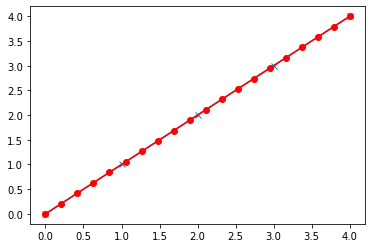

In [17]:
#output of the model
xvec = np.linspace(0, 4, 20)
yvec = session.run(lm,{x:xvec})
plt.plot(x_train, y_train, '-x', xvec, yvec, '-ro')